In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import eli5 
from eli5.sklearn import PermutationImportance
#import shap 
from pdpbox import pdp, info_plots 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
np.random.seed(123)


pd.options.mode.chained_assignment = None 


import os
from sklearn.model_selection import train_test_split


In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'datasets_heart.csv', 'tree.dot', 'Untitled.ipynb']


In [3]:
raw_data = pd.read_csv('datasets_heart.csv')
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


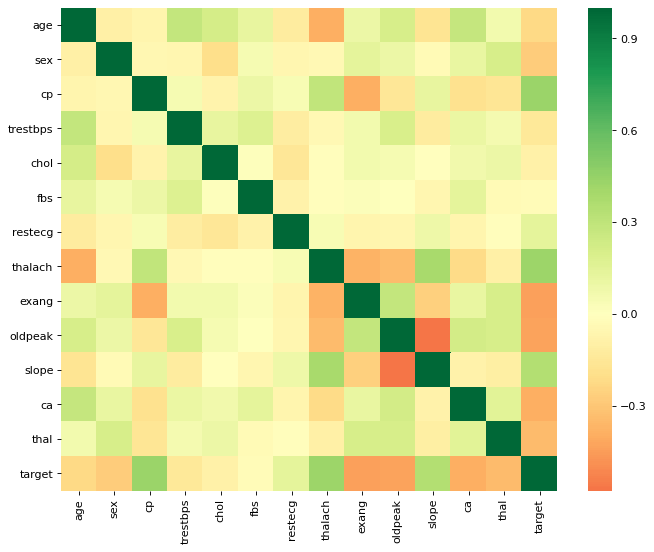

In [6]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(raw_data.corr(), cmap='RdYlGn', center=0);

# cp, thalach and slope are highly correlated with the target

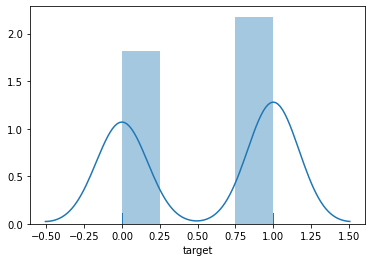

In [7]:
sns.distplot(raw_data['target'], rug=True);

In [8]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "target"
colors = ['orenge', 'light blue']
grouped = raw_data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
#trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0],
               marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

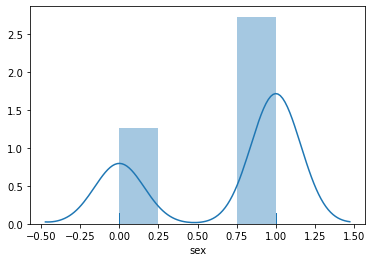

In [9]:
sns.distplot(raw_data["sex"], rug=True);

In [10]:
col = "sex"
colors = ['orenge', 'light blue']
grouped = raw_data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
#trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0],
               marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

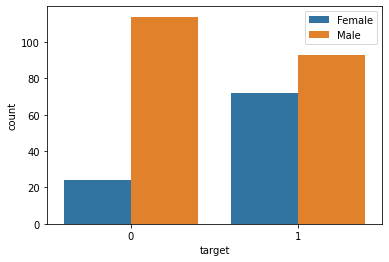

In [11]:
sns.countplot(x=raw_data.target,hue=raw_data.sex)
plt.legend(labels=['Female', 'Male']);

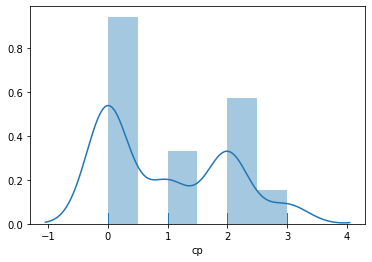

In [12]:
sns.distplot(raw_data['cp'], rug=True);

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


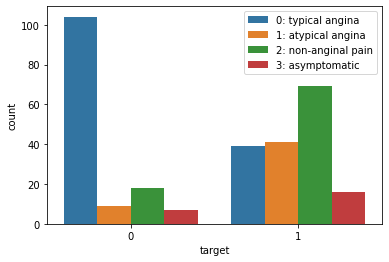

In [13]:
sns.countplot(x=raw_data.target, hue=raw_data.cp)
plt.legend(labels=['0: typical angina', '1: atypical angina','2: non-anginal pain','3: asymptomatic']);
raw_data.head(5)

In [14]:
# Mean Encoding
cumsum = raw_data.groupby('sex')['target'].cumsum() - raw_data['target']
cumcnt = raw_data.groupby('sex').cumcount()
raw_data['sex'] = cumsum/cumcnt
cumsum = raw_data.groupby('fbs')['target'].cumsum() - raw_data['target']
cumcnt = raw_data.groupby('fbs').cumcount()
raw_data['fbs'] = cumsum/cumcnt
raw_data.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,NaN,3,145,233,NaN,0,150,0,2.3,0,0,1,1
1,37,1.0,2,130,250,NaN,1,187,0,3.5,0,0,2,1
2,41,NaN,1,130,204,1.0,0,172,0,1.4,2,0,2,1
3,56,1.0,1,120,236,1.0,1,178,0,0.8,2,0,2,1
4,57,1.0,0,120,354,1.0,1,163,1,0.6,2,0,2,1


# 1.XGBoost

In [15]:
raw_data=raw_data.dropna()
X_train, X_test, y_train, y_test = train_test_split(raw_data.drop('target', 1), 
                                                    raw_data['target'], test_size = .2, random_state=10)

import xgboost as xgb
from xgboost import XGBClassifier
# alg = XGBClassifier(max_depth=8, learning_rate=0.01, n_estimators=2000,
#                               silent=True, objective='binary:logistic', booster='gbtree')
alg = XGBClassifier(learning_rate=0.01, n_estimators=2000, max_depth=8,
                        min_child_weight=0, gamma=0, subsample=0.52, colsample_bytree=0.6,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, 
                    seed=27, reg_alpha=5, reg_lambda=2, booster='gbtree',
            n_jobs=-1, max_delta_step=0, colsample_bylevel=0.6, colsample_bynode=0.6)
alg.fit(X_train, y_train)
print('train accuracy',alg.score(X_train, y_train))
print('test accuracy',alg.score(X_test,y_test))

train accuracy 0.9958333333333333
test accuracy 0.9833333333333333


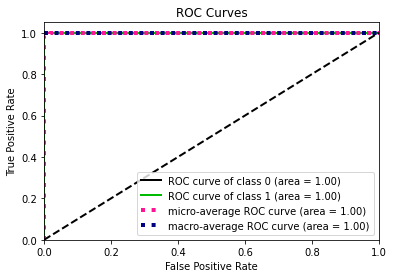

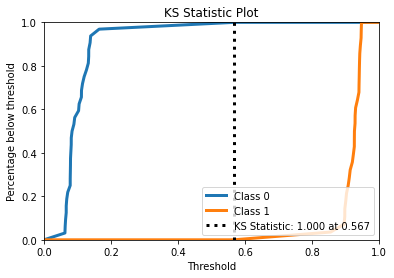

In [16]:
import scikitplot as skplt
xgb_prob = alg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, xgb_prob)
skplt.metrics.plot_ks_statistic(y_test, xgb_prob)

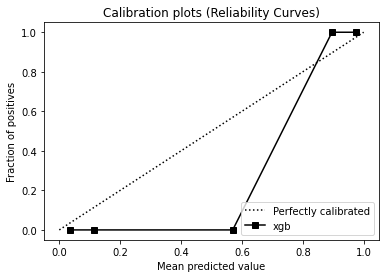

In [17]:
probas_list1 = [alg.predict_proba(X_test)]
xy=['xgb']
skplt.metrics.plot_calibration_curve(y_test,
                                      probas_list1,
                                    xy)

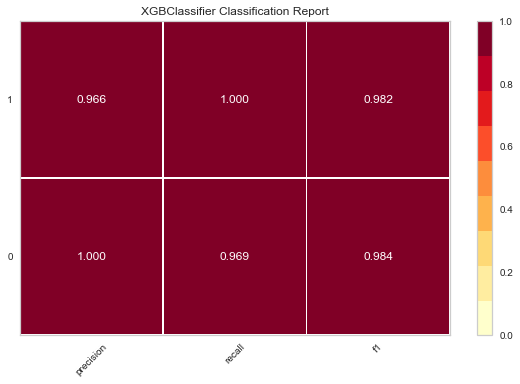

In [18]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix
classes=[0,1]
visualizer = ClassificationReport(alg, classes=classes)
#visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

# 2.Random Forest


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600,random_state=0, n_jobs= -1)
rf = rf.fit(X_train, y_train)
print('train accuracy',rf.score(X_train, y_train))
print('test accuracy',rf.score(X_test,y_test))

train accuracy 1.0
test accuracy 0.9833333333333333


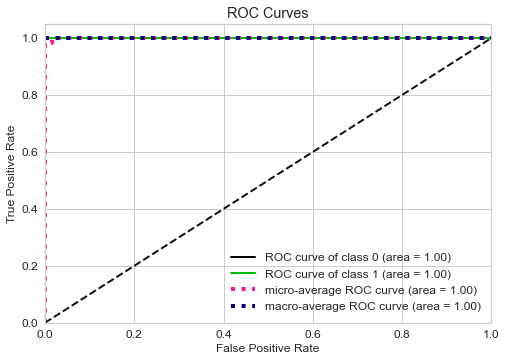

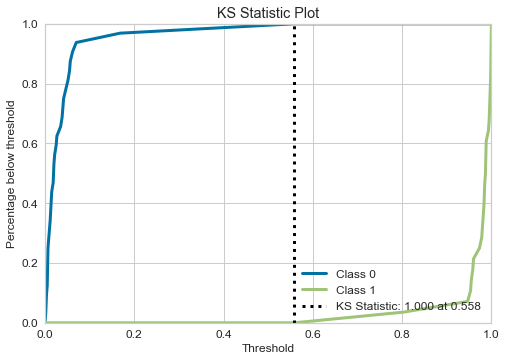

In [20]:
rdf_prob = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, rdf_prob)
skplt.metrics.plot_ks_statistic(y_test, rdf_prob)
plt.show()

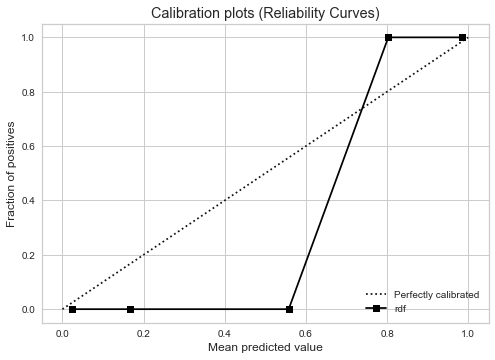

In [21]:
probas_list1 = [rf.predict_proba(X_test)]
xy=['rdf']
skplt.metrics.plot_calibration_curve(y_test,
                                      probas_list1,
                                    xy);

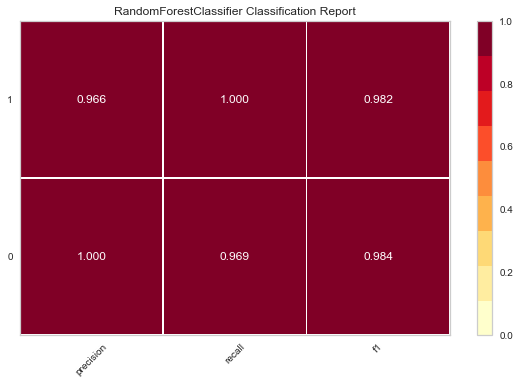

In [22]:
classes=[0,1]
visualizer = ClassificationReport(rf, classes=classes)
#visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()